In [1]:
import numpy as np
from gym_env.envs import ground_env as ge
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3 import DQN, A2C, PPO
import gym
import os
import glob
import random
import matplotlib.pyplot as plt
import plotly.graph_objects as go

/Users/kowshik/projects/personal/reinforcement_learning_optimal_policy/playenv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
rewards_dict = {'cosine_distance_scale': 100, 'penalty_for_one_step': 0.01,
 'penalty_for_one_step_when_ball_is_here': 0.1, 'reward_for_catch':100, 'time_between_catch_next_ball':100,
  'game_end_total':1000,'game_end_pickup_time':10000}
length_of_test = 10*1e3
  
reward_params = list(rewards_dict.values())
env = ge.playground_env(100,'center','radial',reward_params =  reward_params)
model = DQN("MlpPolicy", env, verbose=0, tensorboard_log="sac",learning_rate=0.001)
model.learn(total_timesteps=1*1e5, log_interval=4,)
model.save("models/station_policy")


In [3]:
model =  DQN.load('models/station_policy')
done = False
reward_params_test = reward_params
reward_params_test[-1] = length_of_test
env = ge.playground_env(100,'center','radial',reward_params = reward_params)
obs = env.reset()
action_profile = []
reward_profile = []
frames_ = []
X_station = []
Y_station = []
c = 0
while not done:
    c = c +1 
    act = model.predict(obs)
    obs_, reward, done, info = env.step(act[0])
    obs = obs_
    action_profile.append([act[0]])
    reward_profile.append(reward)
    if env.PG.generated:
        frames_.append(go.Frame(data=[go.Scatter(x=[env.PG.pos[0], env.PG.ran_pos[0]], y=[env.PG.pos[1], env.PG.ran_pos[1]])]))
    else:
        frames_.append(go.Frame(data=[go.Scatter(x=[env.PG.pos[0]], y=[env.PG.pos[1]])]))
        X_station.append(env.PG.pos[0])
        Y_station.append(env.PG.pos[1])

In [4]:
from turtle import color
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Scatter(mode='markers',marker=dict(size=[15, 40], color = ['green','red']), text=['🚶','⚽️'], marker_symbol= ['star-triangle-up','circle'])],
    layout=go.Layout(
        xaxis=dict(range=[0, 100], autorange=False),
        yaxis=dict(range=[0, 100], autorange=False),
        title="Start Title",
        updatemenus=[dict(buttons = [dict(
                                        args = [None, {"frame": {"duration": 0, 
                                                                "redraw": False},
                                                        "fromcurrent": True, 
                                                        "transition": {"duration": 0}}],
                                        label = "Play",
                                        method = "animate")],
                                type='buttons',
                                showactive=False)]
    ),
    frames=frames_
)
fig.update_layout(width= 600, height= 600)
fig.show()

In [78]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(x=X_station, y=Y_station, mode='markers'))
fig.show()

In [44]:

files = glob.glob('plots/*png')
for f in files:
    os.remove(f)
done = False
reward_params_test = reward_params
reward_params_test[-1] = 1e3
env = ge.playground_env(100,'center','inverse_radial',reward_params = reward_params)
obs = env.reset()
c = 0
action_profile = []
reward_profile = []
while not done:
    act = model.predict(obs)
    obs_, reward, done, info = env.step(act[0])
    obs = obs_
    if c%1 == 0:
        action_profile.append([act[0]])
        reward_profile.append(reward)
        plt.imsave('plots/' +str(c)+'.png', env.PG.grid)
    c = c+1
    if env.PG.generated:
        print(env.PG.pos, env.PG.ran_pos)

[40 65] [10, 38]
[40 64] [10, 38]
[40 63] [10, 38]
[39 63] [10, 38]
[38 63] [10, 38]
[37 63] [10, 38]
[37 62] [10, 38]
[36 62] [10, 38]
[35 62] [10, 38]
[34 62] [10, 38]
[33 62] [10, 38]
[33 61] [10, 38]
[32 61] [10, 38]
[32 60] [10, 38]
[31 60] [10, 38]
[31 59] [10, 38]
[30 59] [10, 38]
[30 58] [10, 38]
[29 58] [10, 38]
[29 57] [10, 38]
[28 57] [10, 38]
[28 56] [10, 38]
[27 56] [10, 38]
[27 55] [10, 38]
[26 55] [10, 38]
[26 54] [10, 38]
[25 54] [10, 38]
[25 53] [10, 38]
[24 53] [10, 38]
[24 52] [10, 38]
[23 52] [10, 38]
[23 51] [10, 38]
[22 51] [10, 38]
[22 50] [10, 38]
[21 50] [10, 38]
[21 49] [10, 38]
[20 49] [10, 38]
[20 48] [10, 38]
[20 47] [10, 38]
[19 47] [10, 38]
[19 46] [10, 38]
[18 46] [10, 38]
[18 45] [10, 38]
[17 45] [10, 38]
[17 44] [10, 38]
[16 44] [10, 38]
[16 43] [10, 38]
[15 43] [10, 38]
[15 42] [10, 38]
[14 42] [10, 38]
[13 42] [10, 38]
[13 41] [10, 38]
[12 41] [10, 38]
[30 58] [7, 27]
[30 57] [7, 27]
[30 56] [7, 27]
[30 55] [7, 27]
[30 54] [7, 27]
[30 53] [7, 27]
[30

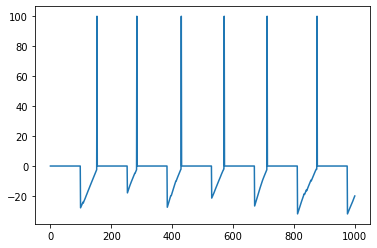

In [22]:
plt.plot(reward_profile)

In [ ]:
import cv2
import os

image_folder = 'plots'
video_name = '/Users/kowshik/Desktop/file.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images = np.sort(images)
images = [str(i)+'.png' for i in range(len(images))]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape
fourcc = 0

video = cv2.VideoWriter(video_name, fourcc, 10, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()


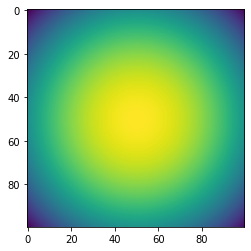

In [27]:
weights_ = env.PG.grid
pg = env.PG.positional_grid
for i in range(len(pg)):
    weights_[pg[i][0]][pg[i][1]] = env.PG.weights_[i]
weights_ = (weights_+5000)/5000
plt.imshow(weights_)

In [ ]:
marker: {symbol: "hexagon2-dot"}
